In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dot, Dense, Add, Concatenate
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
import numpy as np

## Load Data

In [ ]:
import json

def load_data_from_json(filepath):
    """Loads data from a JSON file, handling potential multiple JSON objects.

    Args:
        filepath: The path to the JSON file.

    Returns:
        A list of dictionaries containing the data loaded from the JSON file,
        or None if an error occurs.
    """
    try:
        data = []
        with open(filepath, 'r') as file:
            for line in file:
                # Try to decode each line as a separate JSON object
                try:
                    data.append(json.loads(line))
                except json.JSONDecodeError as e:
                    print(f"Warning: Skipping invalid JSON line: {line.strip()[:50]}... - Error: {e}")
        return data
    except FileNotFoundError:
        print(f"Error: File not found at {filepath}")
        return None

In [ ]:
data = load_data_from_json('/content/drive/MyDrive/CMPE256/CMPE256_Project/dataset/image_review_all.json')

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.keys()

Index(['business_id', 'user_id', 'rating', 'review_text', 'pics'], dtype='object')

In [ ]:
max_rating = df['rating'].max()
print(f"The maximum rating in the dataset is: {max_rating}")

The maximum rating in the dataset is: 5


In [ ]:
min_rating = df['rating'].min()
print(f"The minimum rating in the dataset is: {min_rating}")

The minimum rating in the dataset is: 1


In [ ]:
unique_user_ids = df['user_id'].nunique()
total_user_ids = len(df['user_id'])
print(f"Total number of User IDs: {total_user_ids}")
print(f"Number of unique User IDs: {unique_user_ids}")

Total number of User IDs: 1487747
Number of unique User IDs: 868937


In [ ]:
unique_business_ids = df['business_id'].nunique()
total_business_ids = len(df['business_id'])
print(f"Total number of Business IDs: {total_business_ids}")
print(f"Number of unique Business IDs: {unique_business_ids}")

Total number of Business IDs: 1487747
Number of unique Business IDs: 64527


In [ ]:
# 1. Data Types and Missing Values
print("Data Types and Missing Values:")
print(df.info())

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1487747 entries, 0 to 1487746
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   business_id  1487747 non-null  object
 1   user_id      1487747 non-null  object
 2   rating       1487747 non-null  int64 
 3   review_text  1487747 non-null  object
 4   pics         1487747 non-null  object
dtypes: int64(1), object(4)
memory usage: 56.8+ MB
None



Rating Distribution:
rating
5    68.120050
4    19.432471
3     5.950810
1     3.941866
2     2.554803
Name: proportion, dtype: float64


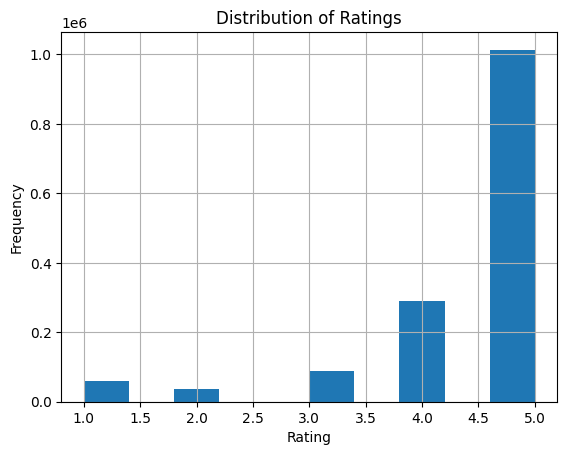

In [ ]:
# 2. Rating Distribution Analysis
print("\nRating Distribution:")
print(df['rating'].value_counts(normalize=True) * 100) # Percentage distribution
import matplotlib.pyplot as plt
df['rating'].hist()
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()


User Activity Analysis:
count    868937.000000
mean          1.712146
std           2.175213
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         117.000000
Name: count, dtype: float64


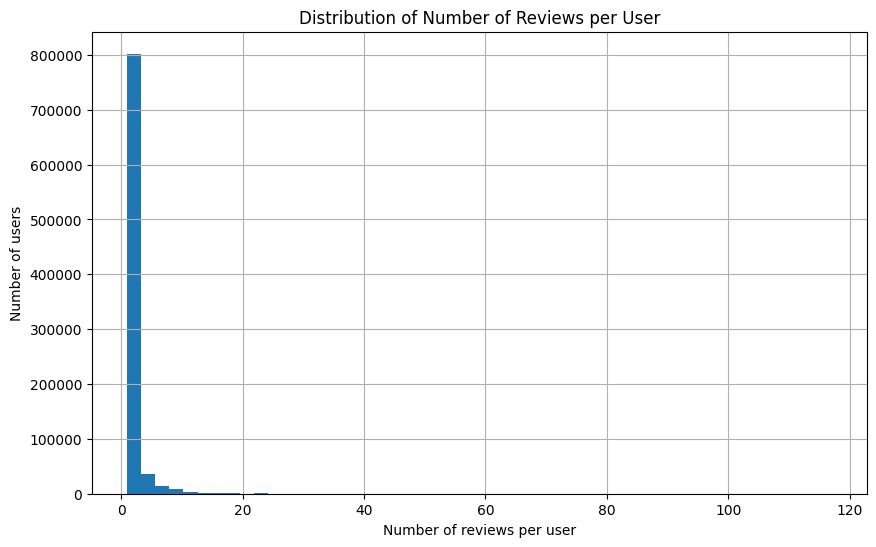

In [ ]:
# 3. User Activity Analysis (if relevant)
print("\nUser Activity Analysis:")
user_activity = df['user_id'].value_counts()
print(user_activity.describe()) #Summary statistics
plt.figure(figsize=(10,6))
user_activity.hist(bins=50)
plt.xlabel("Number of reviews per user")
plt.ylabel("Number of users")
plt.title("Distribution of Number of Reviews per User")
plt.show()


Business Popularity Analysis:
count    64527.000000
mean        23.056194
std         43.317516
min          1.000000
25%          5.000000
50%         11.000000
75%         25.000000
max       1662.000000
Name: count, dtype: float64


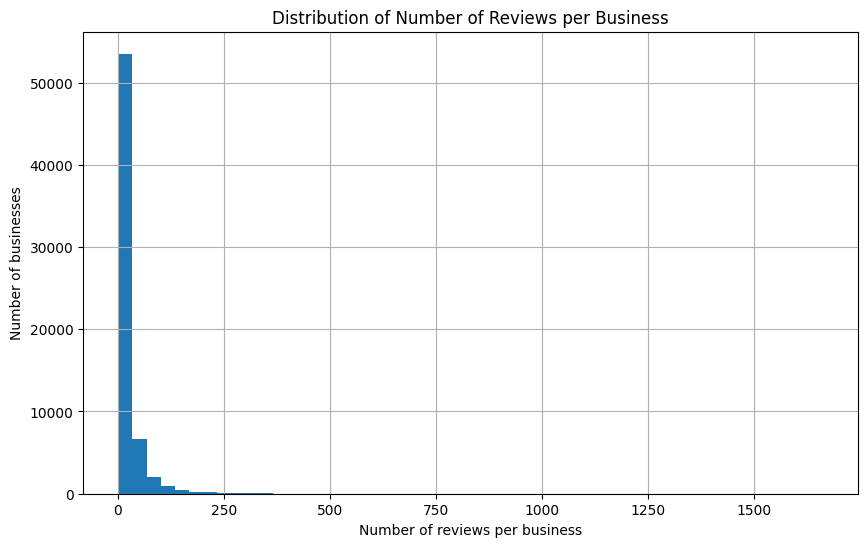

In [ ]:
# 4. Business Popularity Analysis
print("\nBusiness Popularity Analysis:")
business_popularity = df['business_id'].value_counts()
print(business_popularity.describe()) #Summary statistics
plt.figure(figsize=(10,6))
business_popularity.hist(bins=50)
plt.xlabel("Number of reviews per business")
plt.ylabel("Number of businesses")
plt.title("Distribution of Number of Reviews per Business")
plt.show()